In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl

# Dictionary properties

First, we want to generate the matrix $U$ corresponding to the dictionary of Haar wavelets.
The following implementation is based on formulas (8) and (9) in
https://iopscience.iop.org/article/10.1088/0305-4470/36/24/316/pdf

In [6]:
def haarMatrix(n):
    if n > 2:
        h = haarMatrix(n / 2)
    else:
        return np.array([[1, 1], [1, -1]])

    # calculate upper haar part
    h_n = np.kron(h, [1, 1])
    
    # calculate lower haar part 
    h_i = np.sqrt(n/2)*np.kron(np.eye(len(h)), [1, -1])

    # combine parts
    h = np.vstack((h_n, h_i))
    return h

Run the code below to generate a visual representation of $U$. Enjoy the symmetry and understand why we need $K$ to be a power of 2.

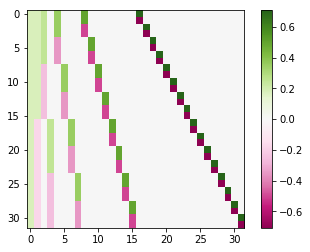

In [7]:
K = 32 #size of the dictionary. MUST be a power of 2.
U = np.transpose(haarMatrix(K)/np.sqrt(K)) #computing dictionary matrix. 
plt.imshow(U, cmap='PiYG', interpolation='nearest')
plt.colorbar()
plt.show()

**Question:** Why are the entries in the last columns of dark color? Why is this crucial? (Hint: Energy, cf. Ex 1)

Next, notice that $U$ is orthonormal

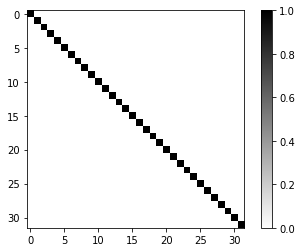

In [8]:
plt.imshow(np.dot(np.transpose(U),U),cmap='binary', interpolation='nearest')
plt.colorbar()
plt.show()

# Coding step

**Task A :** build a sparse signal corrupted by small Gaussian noise in the cell below

<function matplotlib.pyplot.show(*args, **kw)>

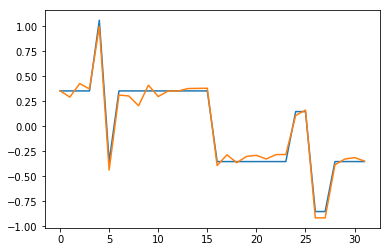

In [9]:
# solution
z_true = np.zeros((K,)) 
z_true[1] = 2
z_true[int(K/2)-2] = 1
z_true[int(K/2)+2] = 1
x_true = np.dot(U,z_true)
x_noisy = x_true + 0.05*np.random.normal(size=K)
plt.plot(range(K),x_true,range(K),x_noisy)
plt.show

# Decoding step

**Task B :** Compute the Haar transform of the noisy signal and plot it. What do you notice?

In [10]:
#solution


**Task C :** Compare this to what you learned in Exercise 1. Does the math match what we observ

In [11]:
#solution
